In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x = [1, 2.2, 3.5, 4.2, 4.9]
y = [2, 2.5, 2.9, 3.6, 4.1]

x_vel = [x[i] - x[i-1] for i in range(1, len(x))]
y_vel = [y[i] - y[i-1] for i in range(1, len(y))]

In [3]:
def plot_traj_base():
    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.xlim(0, 10)
    plt.ylim(0, 8)
    plt.grid(alpha=0.5)
    #plt.show()

In [5]:
x_pred = [x[-1] + np.mean(x_vel)*i for i in range(len(x))]
y_pred = [y[-1] + np.mean(y_vel)*i for i in range(len(x))]

### Constant velocity

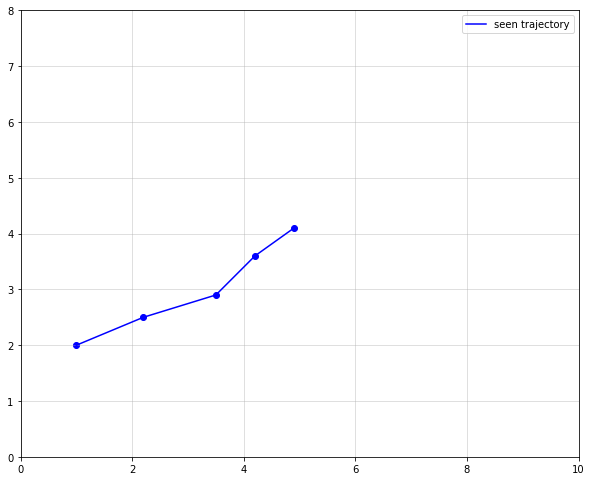

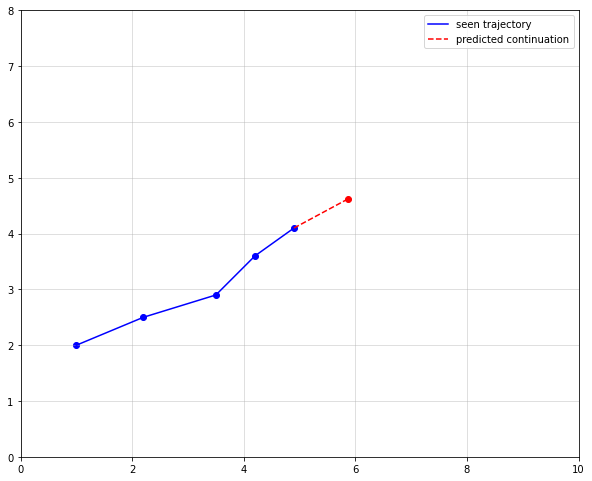

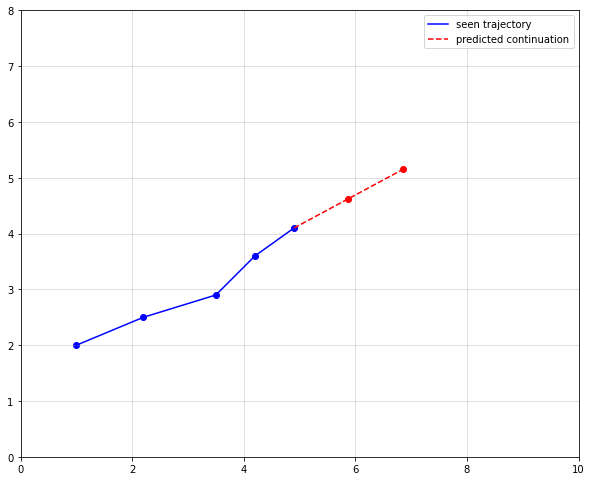

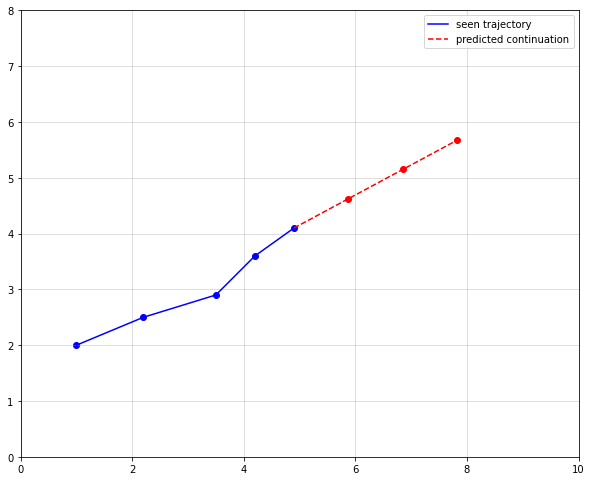

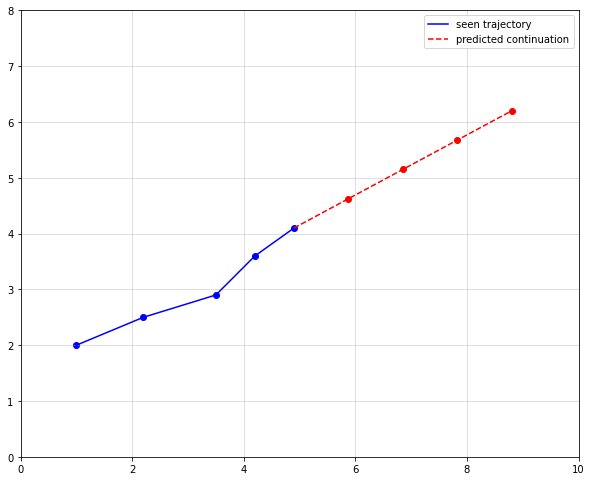

In [7]:
for i in range(1, len(x)+1):
    plot_traj_base()

    plt.plot(x, y, 'b', label='seen trajectory')
    plt.scatter(x, y, c='b')

    if i != 1:
        plt.plot(x_pred[:i], y_pred[:i], 'r--', label='predicted continuation')
        plt.scatter(x_pred[1:i], y_pred[1:i], c='r')
    plt.legend()
    plt.show()

### Constant turning

In [127]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

def constant_turning(sample_x, sample_y, noise_var):
    sample_vel_x = [(sample_x[i] - sample_x[i-1]) + np.random.normal(0, noise_var) for i in range(1, len(sample_x))]
    sample_vel_y = [(sample_y[i] - sample_y[i-1]) + np.random.normal(0, noise_var) for i in range(1, len(sample_y))]
    
    all_angles = []
    for i in range(1, len(sample_vel_x)):
        prev_vel = [sample_vel_x[i-1], sample_vel_y[i-1]]
        curr_vel = [sample_vel_x[i], sample_vel_y[i]]
        one_angle = np.math.atan2(np.linalg.det([prev_vel, curr_vel]),np.dot(prev_vel, curr_vel))   
        all_angles.append(one_angle)
    
    avg_angle = np.mean(all_angles)
    
    avg_vel_x = np.mean(sample_vel_x)
    avg_vel_y = np.mean(sample_vel_y)
    
    pred_x = [sample_x[-1] + i*avg_vel_x for i in range(1, 6)]
    pred_y = [sample_y[-1] + i*avg_vel_y for i in range(1, 6)]

    rot_pred_x = [pred_x[0]]
    rot_pred_y = [pred_y[0]]
    rot_pred_x[0] = sample_x[-1] + math.cos(avg_angle) * (rot_pred_x[0] - sample_x[-1]) - math.sin(avg_angle) * (rot_pred_y[0] - sample_y[-1])
    rot_pred_y[0] = sample_y[-1] + math.sin(avg_angle) * (rot_pred_x[0] - sample_x[-1]) + math.cos(avg_angle) * (rot_pred_y[0] - sample_y[-1])
    avg_vel_x = rot_pred_x[0] - sample_x[-1]
    avg_vel_y = rot_pred_y[0] - sample_y[-1]
    for i in range(1, 5):

        rot_pred_x.append(rot_pred_x[-1] + avg_vel_x)
        rot_pred_y.append(rot_pred_y[-1] + avg_vel_y)
        
        prev_x = rot_pred_x[i-1]
        cur_x = rot_pred_x[i]
        prev_y = rot_pred_y[i-1]
        cur_y = rot_pred_y[i]
        
        rot_x, rot_y = rotate((prev_x, prev_y), (cur_x, cur_y), avg_angle)
        
        rot_pred_x[i] = rot_x
        rot_pred_y[i] = rot_y
        
        # redefine the average velocity as it now has a new heading
        avg_vel_x = rot_x - prev_x
        avg_vel_y = rot_y - prev_y
    
    return rot_pred_x, rot_pred_y

In [128]:
x = [1, 2.2, 3.3, 4.2, 5.0]
y = [2, 2.2, 2.6, 3.1, 3.7]

x_pred, y_pred = constant_turning(x, y, 0.3)
x_pred = [x[-1]] + x_pred
y_pred = [y[-1]] + y_pred

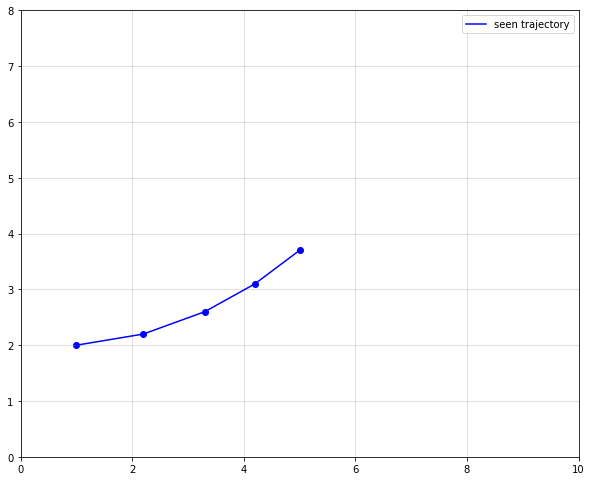

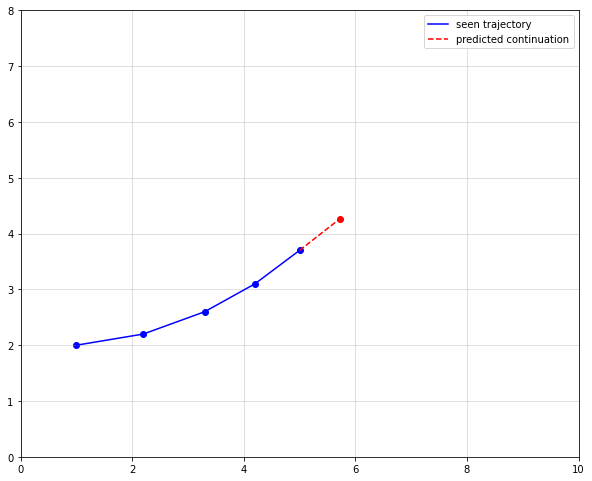

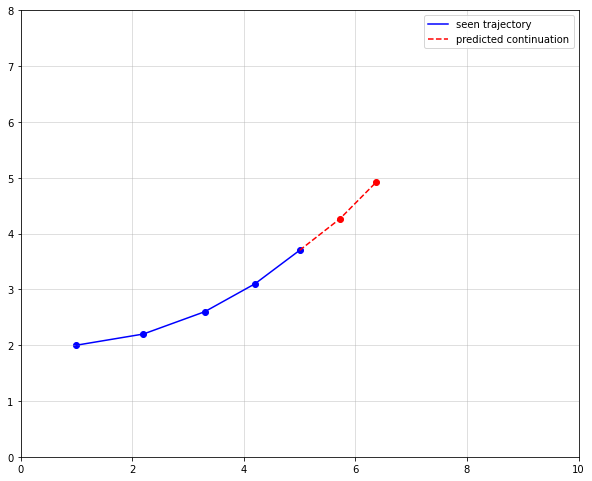

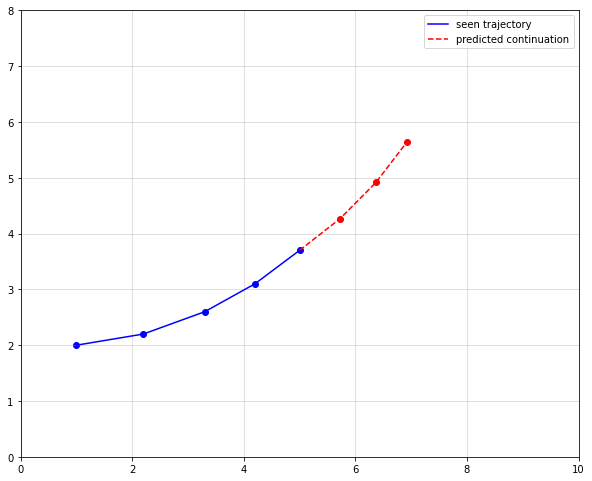

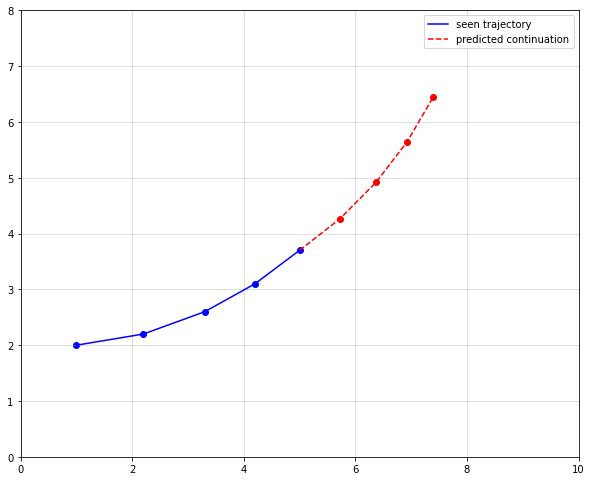

In [129]:
for i in range(1, len(x)+1):
    plot_traj_base()

    plt.plot(x, y, 'b', label='seen trajectory')
    plt.scatter(x, y, c='b')

    if i != 1:
        plt.plot(x_pred[:i], y_pred[:i], 'r--', label='predicted continuation')
        plt.scatter(x_pred[1:i], y_pred[1:i], c='r')
    plt.legend()
    plt.show()

### Example of events

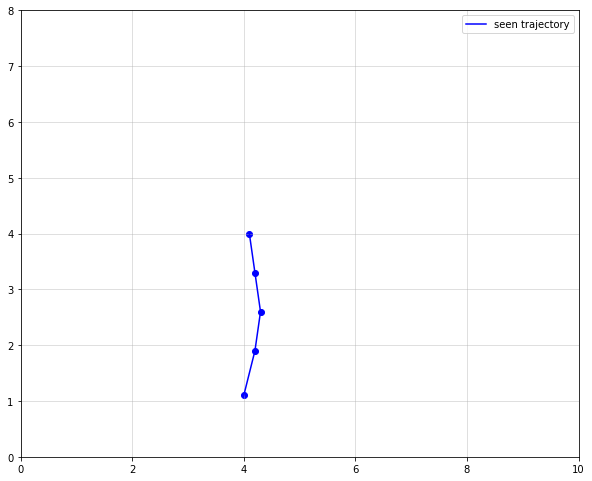

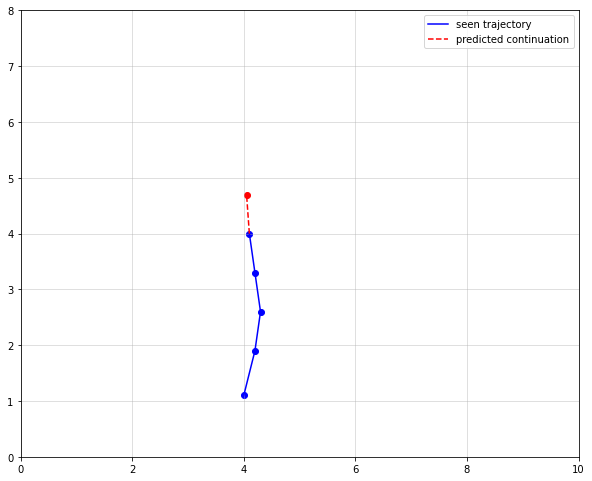

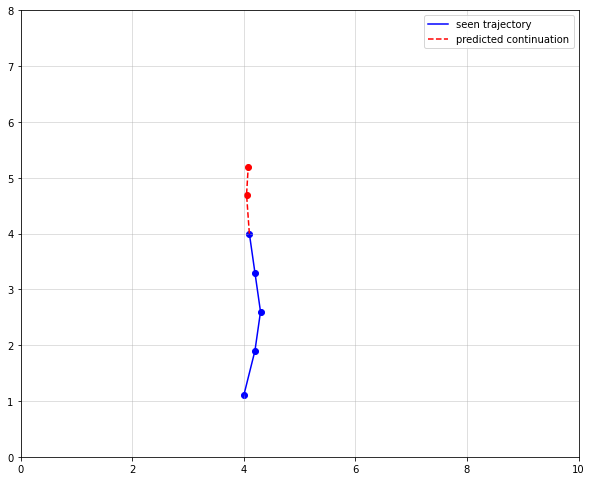

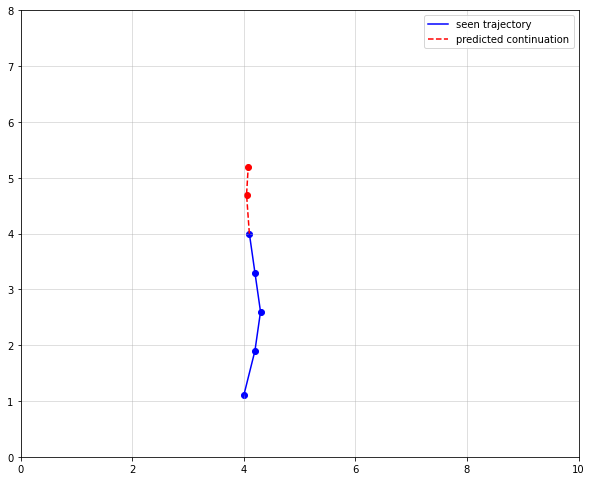

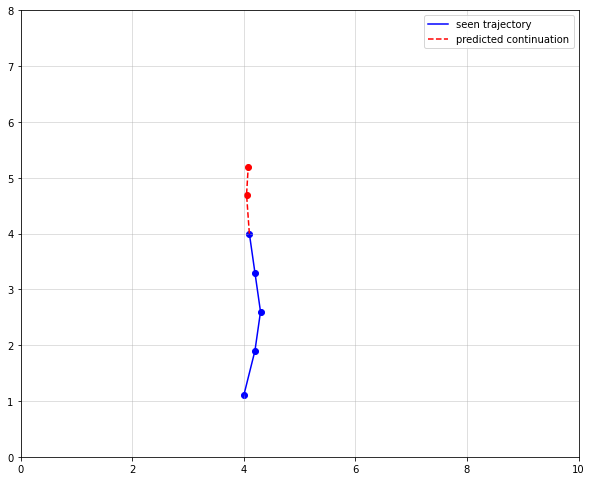

In [138]:
x = [4, 4.2, 4.3, 4.2, 4.1]
y = [1.1, 1.9, 2.6, 3.3, 4.0]


x_pred = [4.1, 4.05, 4.08]
y_pred = [4.0, 4.7, 5.2]

for i in range(1, len(x)+1):
    plot_traj_base()

    plt.plot(x, y, 'b', label='seen trajectory')
    plt.scatter(x, y, c='b')

    if i != 1:
        plt.plot(x_pred[:i], y_pred[:i], 'r--', label='predicted continuation')
        plt.scatter(x_pred[1:i], y_pred[1:i], c='r')
    plt.legend()
    plt.show()

### Other

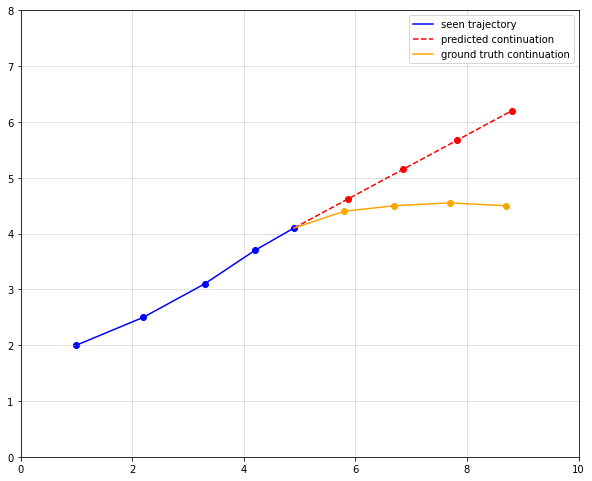

In [131]:
plot_traj_base()

x = [1, 2.2, 3.3, 4.2, 4.9]
y = [2, 2.5, 3.1, 3.7, 4.1]



x_vel = [x[i] - x[i-1] for i in range(1, len(x))]
y_vel = [y[i] - y[i-1] for i in range(1, len(y))]

x_pred = [x[-1] + np.mean(x_vel)*i for i in range(len(x))]
y_pred = [y[-1] + np.mean(y_vel)*i for i in range(len(x))]

x_gt = [x[-1], 5.8, 6.7, 7.7, 8.7]
y_gt = [y[-1], 4.4, 4.5, 4.55, 4.5]

plt.plot(x,y, c='b', label='seen trajectory')
plt.scatter(x,y, c='b')

plt.plot(x_pred, y_pred, 'r--', label='predicted continuation')
plt.scatter(x_pred[1:], y_pred[1:], color='red')

plt.plot(x_gt, y_gt, color='orange', label='ground truth continuation')
plt.scatter(x_gt[1:], y_gt[1:], color='orange')

plt.legend()

In [ ]:
plot_traj_base()

x = [1, 2.2, 3.3, 4.2, 4.9]
y = [2, 2.5, 3.1, 3.7, 4.1]



x_vel = [x[i] - x[i-1] for i in range(1, len(x))]
y_vel = [y[i] - y[i-1] for i in range(1, len(y))]

x_pred = [x[-1] + np.mean(x_vel)*i for i in range(len(x))]
y_pred = [y[-1] + np.mean(y_vel)*i for i in range(len(x))]

x_gt = [x[-1], 5.8, 6.7, 7.7, 8.7]
y_gt = [y[-1], 4.4, 4.5, 4.55, 4.5]

plt.plot(x,y, c='b', label='seen trajectory')
plt.scatter(x,y, c='b')

plt.plot(x_pred, y_pred, 'r--', label='predicted continuation')
plt.scatter(x_pred[1:], y_pred[1:], color='red')

plt.plot(x_gt, y_gt, color='orange', label='ground truth continuation')
plt.scatter(x_gt[1:], y_gt[1:], color='orange')

plt.legend()